<center><br><font size=10>Final Project</font><br>
<br><br>
<b>Introduction to Machine Learning – Digital Sciences for High-Tech</b>
<br><br>
<b>Author</b>: Asaf Biniamini & Guy Maoz
<br><i>Spring 2023</i> </center>

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from typing import List, Dict
%matplotlib inline

In [3]:
# load
data = pd.read_csv("train.csv")
#Converting data to numpy arrays
X, y = data.values[:,:-1], data.values[:, -1]
print(f'X.shape: {X.shape}, y.shape: {y.shape}')

X.shape: (60000, 23), y.shape: (60000,)


# Part 1: Explorization

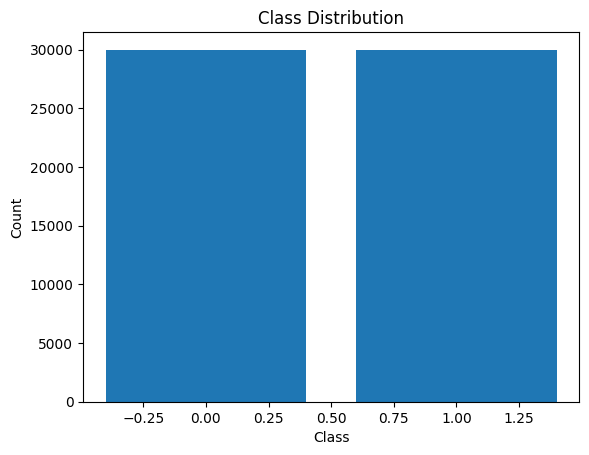

In [4]:
# Plot a bar chart of class distribution
class_counts = pd.Series(y).value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


C:\Users\asafb\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\asafb\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


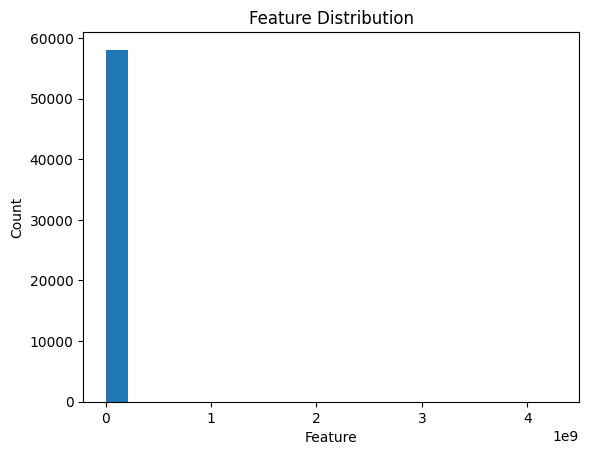

In [6]:
# Plot a histogram of a numeric feature
plt.hist(X[:, 2], bins=20)  # Replace 0 with the index of the feature you want to plot
plt.xlabel('Feature')
plt.ylabel('Count')
plt.title('Feature Distribution')
plt.show()


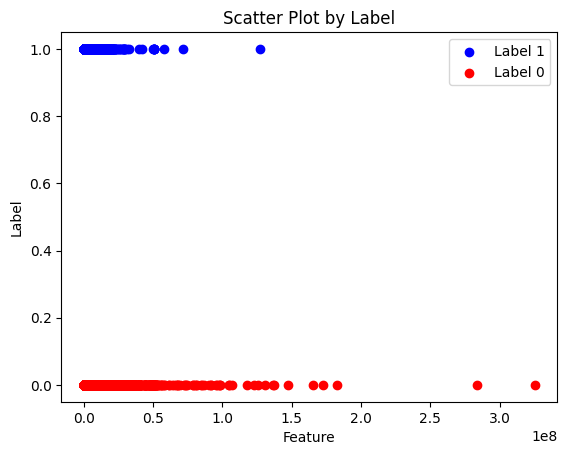

In [8]:


# Separate examples based on labels
label_1_examples = X[y == 1]
label_0_examples = X[y == 0]

# Plot the feature of interest for label 1 examples
plt.scatter(label_1_examples[:, 1], [1] * len(label_1_examples), color='blue', label='Label 1')

# Plot the feature of interest for label 0 examples
plt.scatter(label_0_examples[:, 1], [0] * len(label_0_examples), color='red', label='Label 0')

plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('Scatter Plot by Label')
plt.legend()
plt.show()
